In [16]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [17]:
nn = 20
num_grids = 10

In [18]:
load = loadmat("./gpuexp-8-0.mat")
numB = load["numB"]

In [19]:
fracdims = np.zeros((num_grids,num_grids))
cuts = np.zeros((num_grids,num_grids))
fracdimerr = np.zeros((num_grids,num_grids))

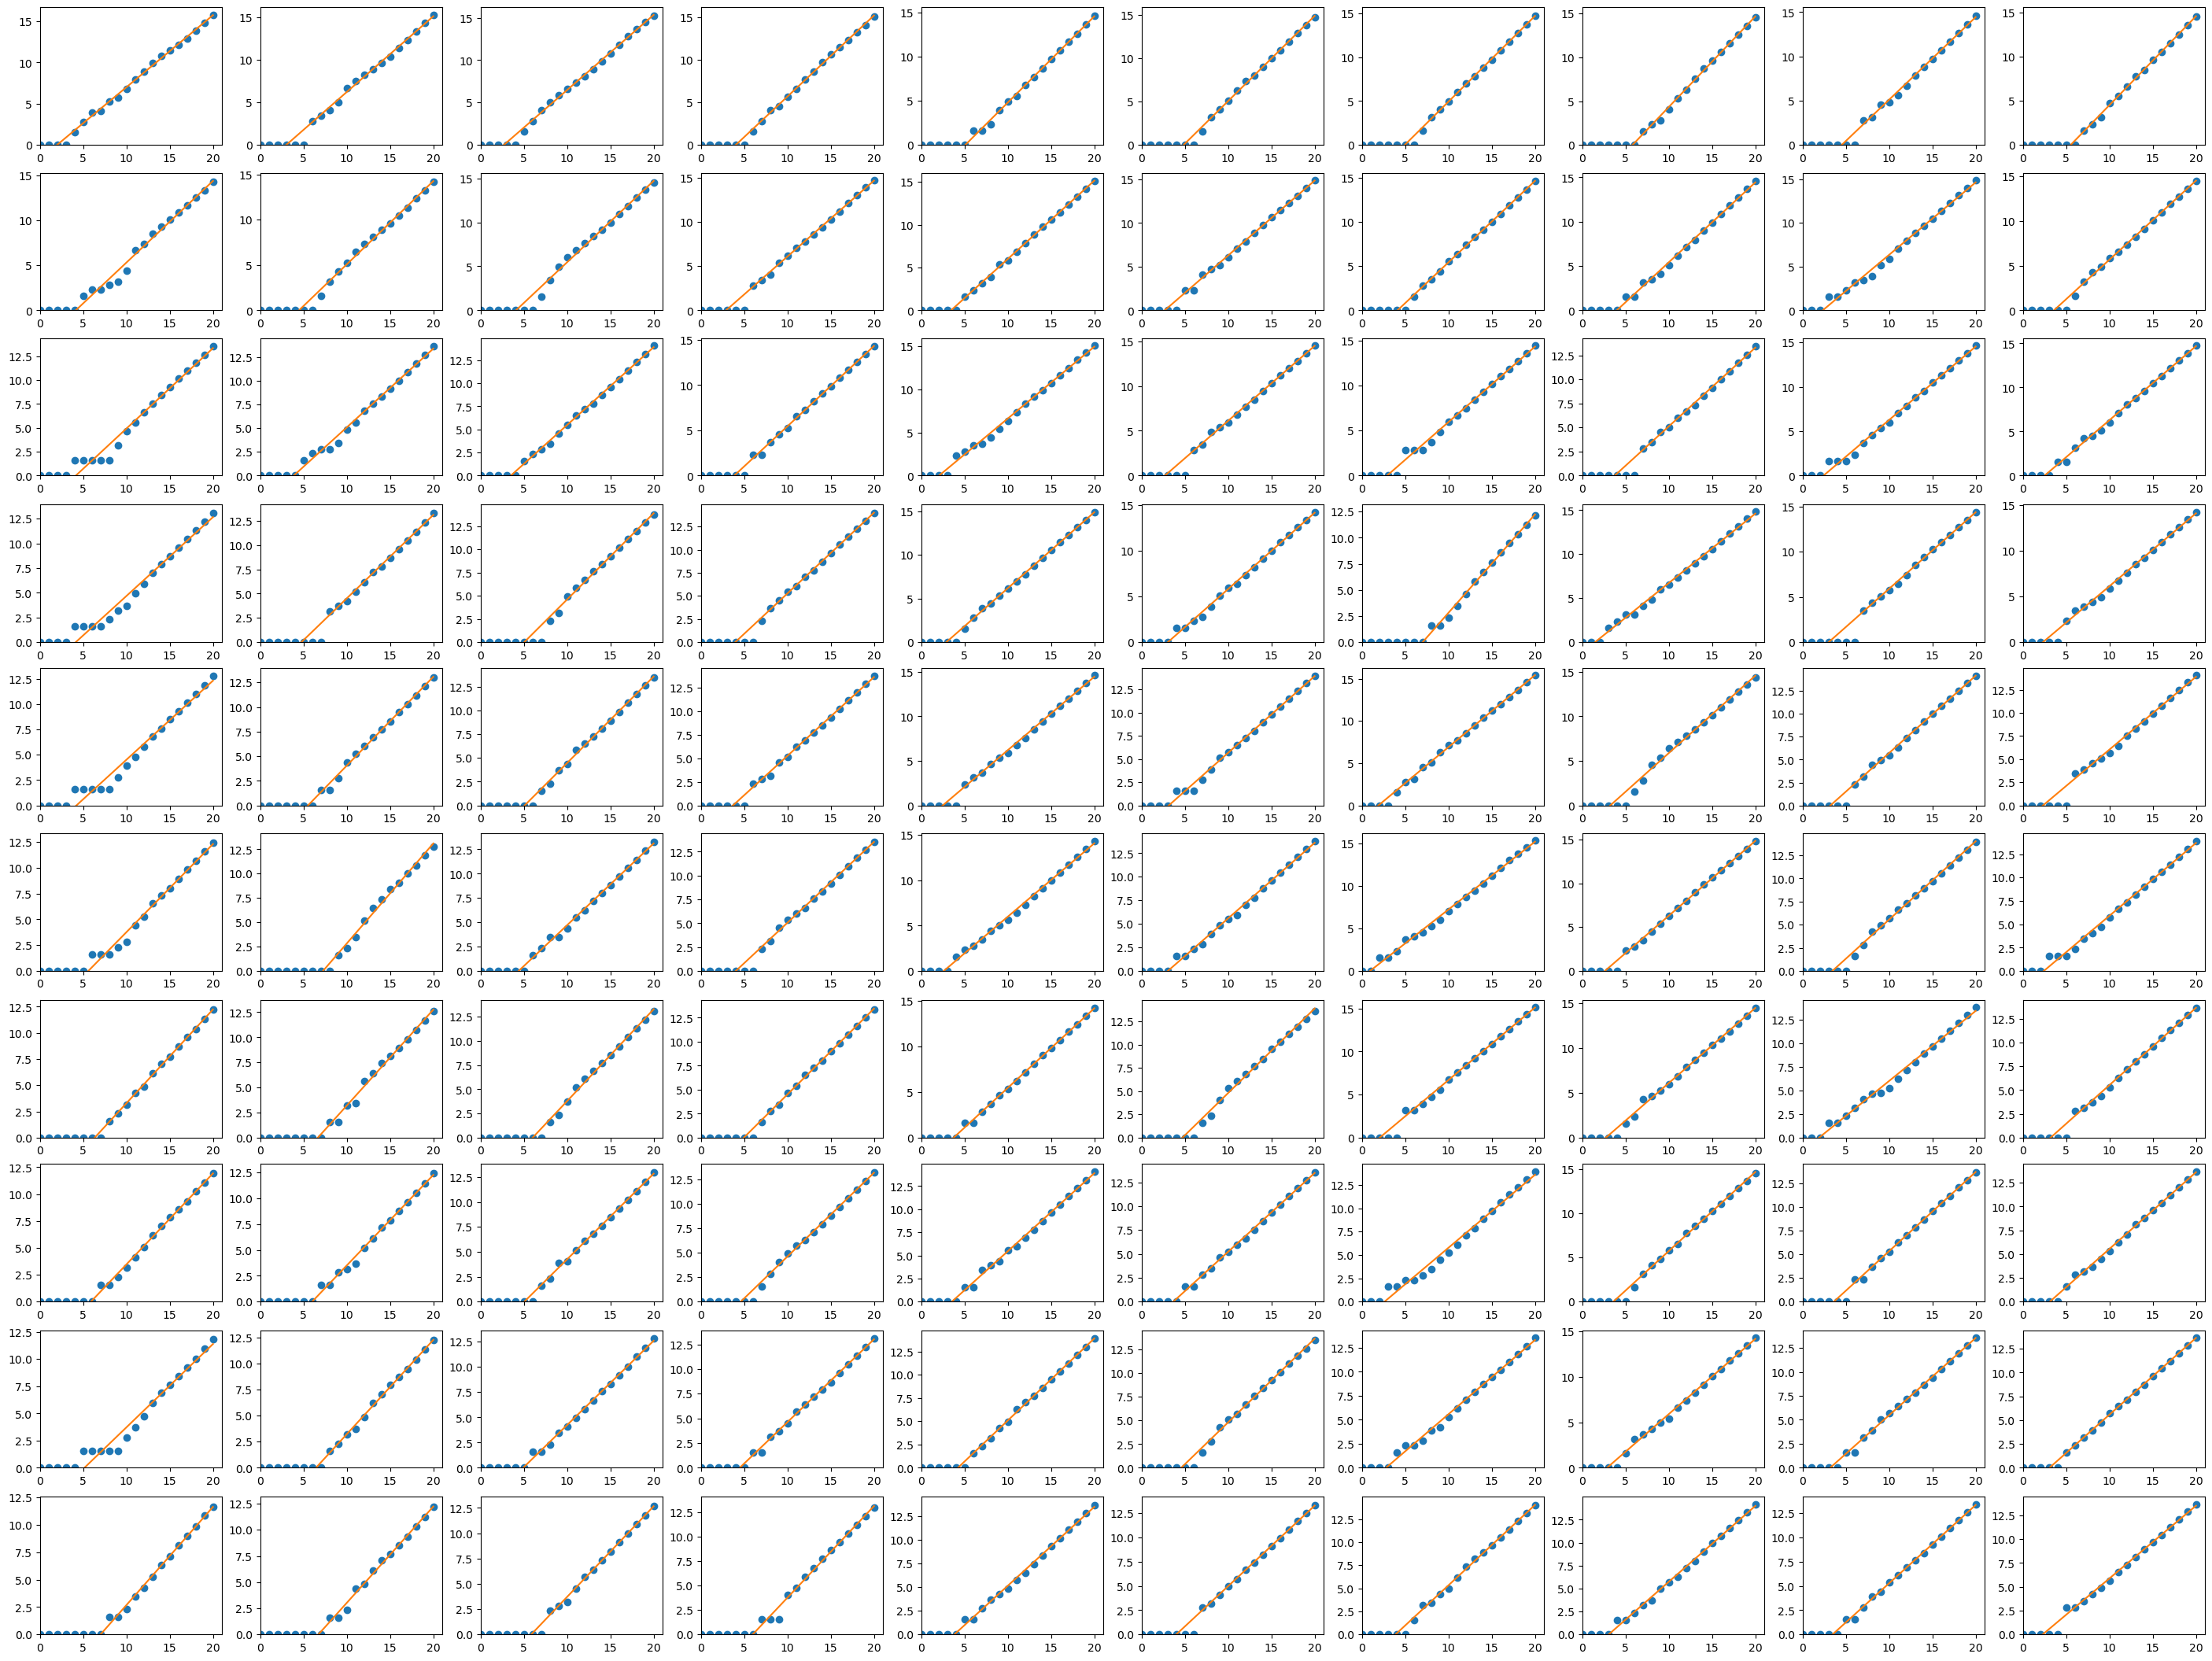

In [20]:
fig, axs = plt.subplots(10,10, figsize=(28, 21), constrained_layout=True)
for i in range(num_grids):
    for j in range(num_grids):
        axs[i, j].plot(np.arange(nn+1), np.log2(numB[i,j]),'o')
        if np.sum(np.log2(numB[i,j,:])>0) > 2:
            pp, VV = np.polyfit(np.arange(nn+1)[np.log2(numB[i,j,:])>0], np.log2(numB[i,j,:])[np.log2(numB[i,j,:])>0], 1, cov=True)
            slope, cut = pp
            fracdims[i,j] = slope
            cuts[i,j] = cut
            fracdimerr[i,j] = np.sqrt(VV[0][0])
        axs[i, j].plot(np.arange(nn+1), fracdims[i,j] * np.arange(nn+1) + cuts[i,j])
        axs[i, j].set_ylim(0,)
        axs[i, j].set_xlim(0,)
        #axs[i, j].set_title('pH of Comm. '+str(ii+1))
#plt.savefig('./figures/exp-4SI.pdf')

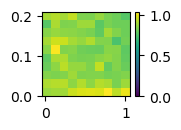

In [32]:
plt.figure(figsize=(3.375/2, 3.375/8.5*3), constrained_layout=True)
plt.imshow(fracdims, origin='lower',extent=(0.01-0.055,1+0.055,0.01-0.0106,0.2+0.0106), aspect=5,vmin=0)
plt.colorbar()
#plt.xlabel('Wavelength, $\lambda$')
#plt.ylabel('Amplitude, $\epsilon$')
plt.savefig('./figures/gpuexp-8-0.pdf')

(0.0, 1.0)

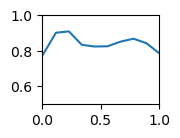

In [22]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
plt.plot(np.linspace(0.01,1,num_grids),fracdims[4])
plt.ylim(0.5,1)
plt.xlim(0,1)
#plt.xlabel('Wavelength, $\lambda$')
#plt.ylabel('Fractal dimention')

(0.0, 0.5)

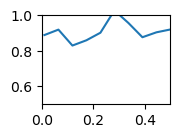

In [23]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
plt.plot(np.linspace(0.01,.5,num_grids),fracdims[:,1])
plt.ylim(0.5,1)
plt.xlim(0,.5)
#plt.xlabel('Amplitude, $\epsilon$')
#plt.ylabel('Fractal dimention')

In [24]:
epsilon = np.linspace(0.01,.2,num_grids)
wl = np.linspace(0.01,1,num_grids)

Wl, Ep = np.meshgrid(wl,epsilon)
#Ep/Wl**2

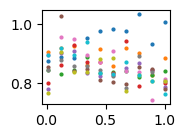

In [25]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
plt.plot((Wl).T, fracdims.T,'o',ms=2)

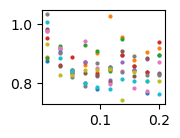

In [26]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
plt.plot((Ep), fracdims,'o',ms=2)

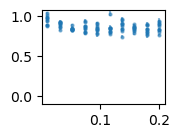

In [33]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
#plt.plot((Ep/Wl**2).reshape(-1), fracdims.reshape(-1),'o',ms=2,alpha = .5)
plt.errorbar((Ep).reshape(-1), fracdims.reshape(-1), fracdimerr.reshape(-1),marker='o',linestyle='none',ms = 2,alpha = .5)
plt.ylim(-0.1,)
#plt.plot(np.ones(10)/2/np.pi, np.linspace(0,1,10))
#plt.plot(np.ones(10)/2/np.pi**2, np.linspace(0,1.2,10),'k--')
plt.savefig('./figures/gpuexp4v0.pdf')